# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise `4` | `Questions`

> "Hi Team! 👋

> The current notebook contains 10 questions that help you review our course content.

> Each question asks you to answer with specific results. Some questions are the `reverse-engineering-type` questions as I have asked in exercise problem set 3. Other questions require direct answers (because, given the nature of the question, reverse-engineering is not feasible).

> These questions won’t be difficult to solve—and answering them will strengthen your understanding of the learning materials. Importantly, the pathway to each answer has been given in lecture scripts, in-class lessons, answers to discussion board questions, and assigned readings. 

> First try to answer to the questions without setting any time constraints. Then, remove all your answers and try to answer again within a 90-minute time limit (and you may refer to lecture notes and review scripts while you are answering). This kind of timed task will improve your performance and prepare you well for the assessment down the line. Once you complete this, submit your script via eLearn.

> Enjoy!"

##### First, let's do some quick exercise with stock prices data.

### <font color = green> Activation of necessary libraries. </font>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from pandas_datareader import data as pdr

import datetime as dt
import yfinance as yf

> Let's set some print option.

In [2]:
np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

### <font color = red> Question 1</font>. Please import historical stock data from the web on the following financial instruments, and create the following DataFrame that contains adjusted closing prices. 

### Here, the timeframe should be set between the 13th of October 2014 through the 13th of September 2022 (nine years of data).

- `WMT` Stock of Walmart
- `IBM` Stock of IBM

In [3]:
tickers = ['IBM', 'WMT']
start = '2014-10-13'
end = '2022-09-14'
prices = (
    yf.download(
        tickers, 
        start, 
        end
    )
    ['Adj Close']
)

prices['IBM'] = prices['IBM'] * 1.0919720378269755
prices['WMT'] = prices['WMT'] * 3.0870453405728755
prices

[*********************100%***********************]  2 of 2 completed


,IBM,WMT
Date,,
2014-10-13,124.599356,65.120006
2014-10-14,124.789463,65.472667
2014-10-15,123.397631,63.138553
2014-10-16,122.100822,61.979892
2014-10-17,123.601309,62.214991
...,...,...
2022-09-07,127.710017,135.739990
2022-09-08,128.470004,136.430001
2022-09-09,129.190009,136.840023


### <font color = red> Question 2</font>. Please run a simple moving average crossover strategy for `IBM`.

### The two moving windows are 20 and 60 days.

### Please show your positions with a plot.

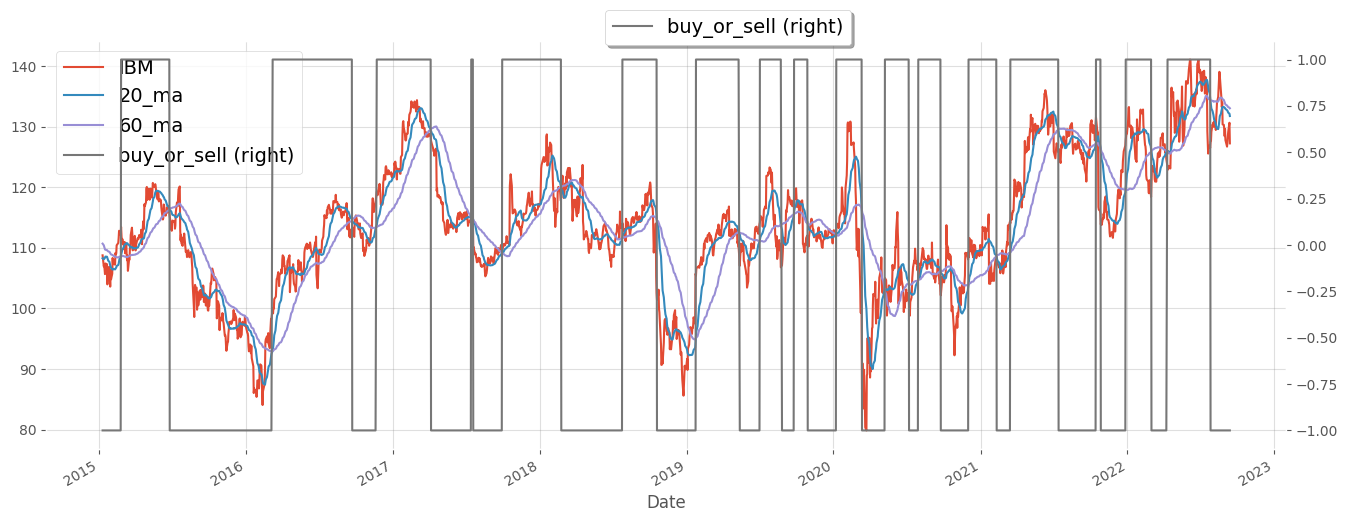

In [4]:
IBM = prices[['IBM']]
IBM['20_ma'] = (
    IBM
    ['IBM']
    .rolling(window = 20)
    .mean()
)

IBM['60_ma'] = (
    IBM
    ['IBM']
    .rolling(window = 60)
    .mean()
)

IBM['buy_or_sell'] = (
    np.where(
        IBM['20_ma'] > IBM['60_ma'],
        1,
        -1
    )
)

IBM['position'] = (
    IBM['buy_or_sell']
    .diff()
)

(
    IBM
    [['IBM', '20_ma', '60_ma', 'buy_or_sell']]
    .iloc[61:, ]
    .plot(
        figsize = [16,6], 
        secondary_y = 'buy_or_sell'
    )
)

(
    plt
    .legend(loc = "upper center",
            shadow = True,
            ncol = 4,
            bbox_to_anchor = (0.55, 1.10),
            fancybox = True)
)

### <font color = red> Question 3</font>. Based on your lines of codes that lead to answer 2 above, compare the returns to see if the strategy leads to a win over the passive benchmark investment.

In [5]:
IBM['log_returns'] = (
    np.log(
        IBM
        ['IBM']
        /
        IBM
        ['IBM']
        .shift(1)
    )
)

IBM['strategy_returns'] = (
    IBM['buy_or_sell']
    .shift(1)
    *
    IBM['log_returns']
)

<Axes: xlabel='Date'>

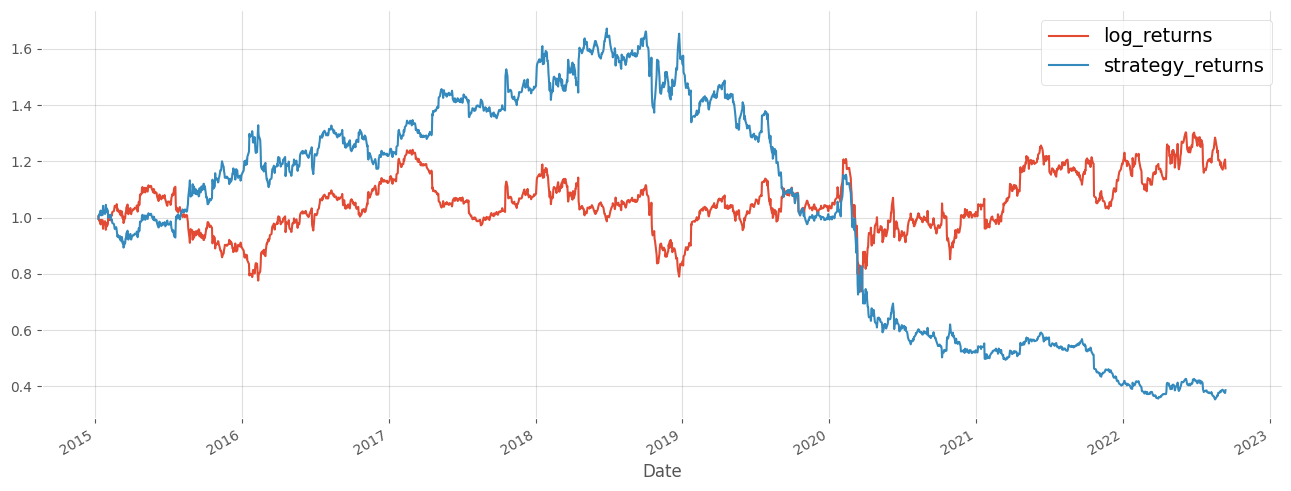

In [6]:
returns = IBM[['log_returns', 'strategy_returns']].iloc[61:, ]
returns.cumsum().apply(np.exp).plot(figsize = [16,6])

### <font color = red> Question 4</font>. Based on your lines of codes that lead to answer 3 above, please calculate the maximum drawdown and the longest drawdown period.

In [7]:
returns['strategy_cum_ret'] = (
    returns
    ['strategy_returns']
    .cumsum()
    .apply(np.exp)
)

returns['max_gross_performance'] = (
    returns['strategy_cum_ret']
    .cummax()
)

<Axes: xlabel='Date'>

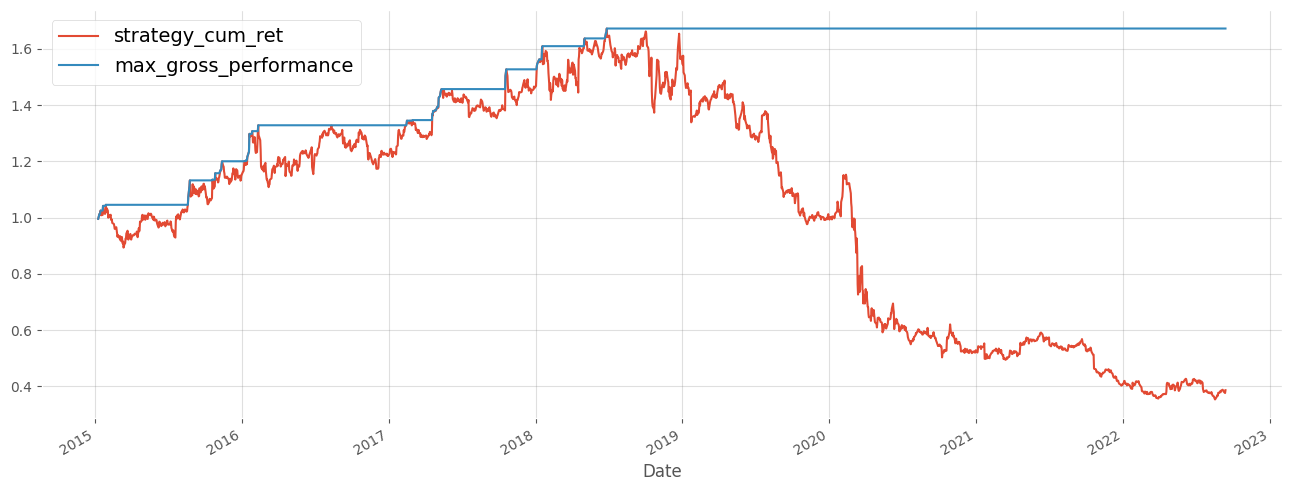

In [8]:
(
    returns
    [['strategy_cum_ret', 'max_gross_performance']]
    .plot(figsize = [16,6])
)

In [9]:
drawdown = 1 - (returns['strategy_cum_ret'] / returns['max_gross_performance'])

periods = (
    np.diff(
        np.append(
            drawdown[drawdown == 0].index,
            drawdown.index[-1 : ]
        )
    )
)

max_period = (
    periods.max()
   /
   np.timedelta64(1, 'D') 
)

print(drawdown.max(), max_period)


0.7884468474348438 1539.0


### Please make sure to answer below.

    The maximum drawdown is about 78.8% percentage points.
    The longest drawdown period lasts for 1,539 days.

### <font color = red> Question 5</font>. Now let’s have a look at the stock price of Walmart (WMT). Please create your strategy based on mean-reversion strategy.

### Here, specifically, please implement a mean-reversion strategy on the basis of a `Simple Moving Average of 41 days` and a `threshold value of 4 for the absolute deviation of the current price` to deviate from the Simple Moving Average to signal a positioning.

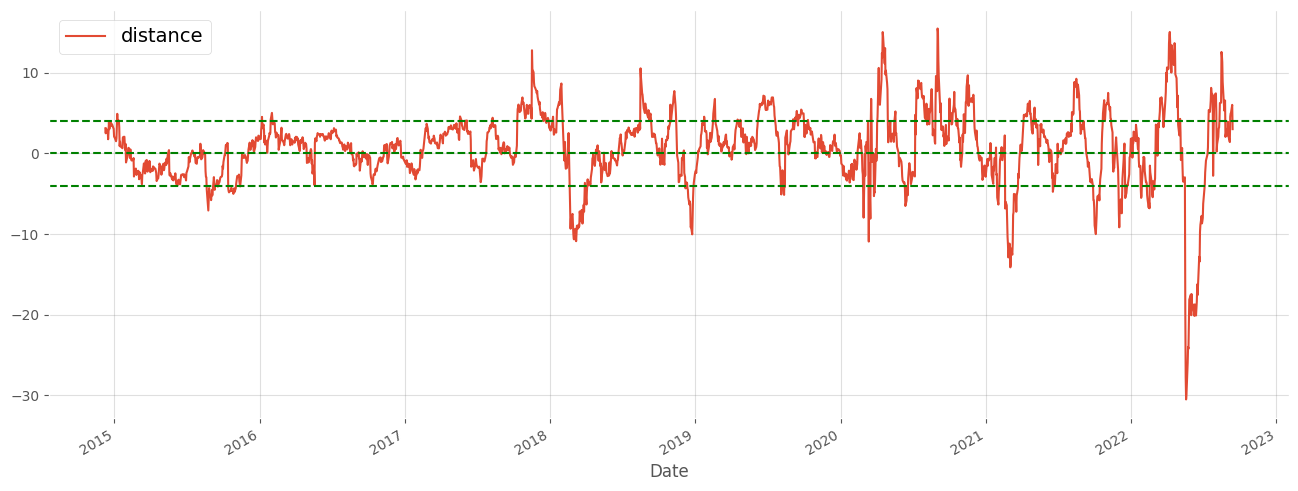

In [10]:
WMT = prices[['WMT']]

WMT['41_ma'] = (
    WMT['WMT']
    .rolling(window = 41)
    .mean()
)

WMT['distance'] = (
    WMT['WMT']
    -
    WMT['41_ma']
)

threshold = 4

WMT[['distance']].plot(figsize = [16,6])
plt.axhline(threshold, color = 'green', ls = '--')
plt.axhline(0, color = 'green', ls = '--')
plt.axhline(-threshold, color = 'green', ls = '--')

### <font color = red> Question 6</font> Now, please plot your buy positions using red dots, and your sell positions using blue dots, as shown below.

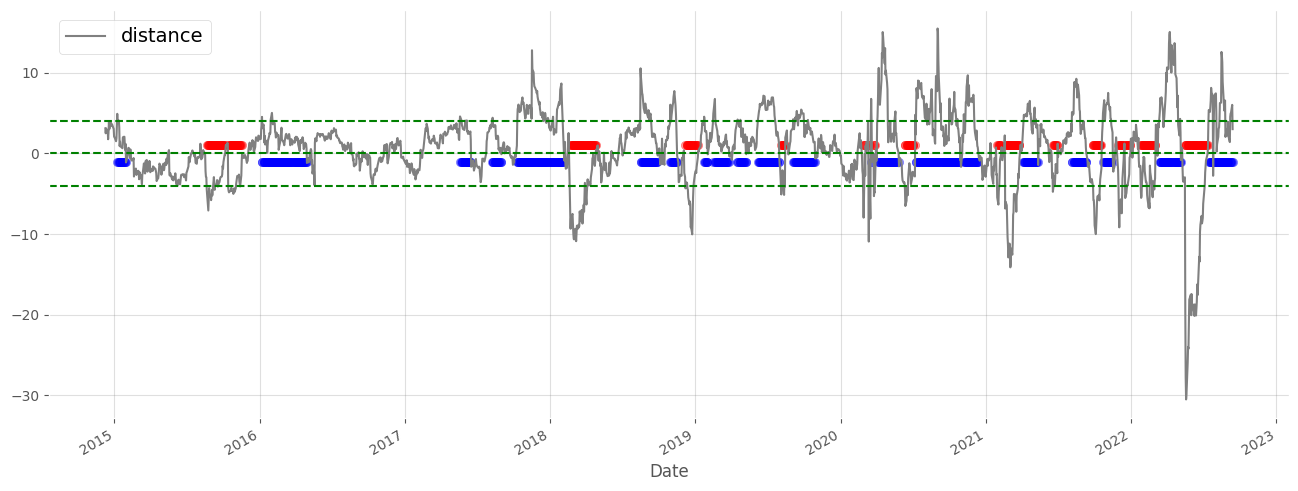

In [11]:
WMT['trading_positions'] = (
    np.where(
        WMT['distance'] > threshold,
        -1, np.nan
    )
)

WMT['trading_positions'] = (
    np.where(
        WMT['distance'] < -threshold,
        1, WMT['trading_positions']
    )
)

WMT['trading_positions'] = (
    np.where(
        WMT['distance'] * WMT['distance'].shift(1) < 0,
        0, WMT['trading_positions']
    )
)

WMT['trading_positions'] = WMT['trading_positions'].ffill()
 
WMT[['distance']].plot(figsize = [16,6], color = 'grey')
plt.scatter(
    x = WMT[WMT['trading_positions'] == 1].index, 
    y = WMT[WMT['trading_positions'] == 1]['trading_positions'], 
    color = 'red', 
    alpha = 0.4
)
plt.scatter(
    x = WMT[WMT['trading_positions'] == -1].index, 
    y = WMT[WMT['trading_positions'] == -1]['trading_positions'], 
    color = 'blue', 
    alpha = 0.4
)
plt.axhline(threshold, color = 'green', ls = '--')
plt.axhline(0, color = 'green', ls = '--')
plt.axhline(-threshold, color = 'green', ls = '--')

In [12]:
WMT['trading_positions'].value_counts()

 0.0    972
-1.0    667
 1.0    295
Name: trading_positions, dtype: int64

### Then, please come up with an answer for the question below.

    Based on mean-reversion strategy, there were 537 trading opportunities found.

### <font color = red> Question 7</font> Please draw the strategy returns as shown below.

<Axes: xlabel='Date'>

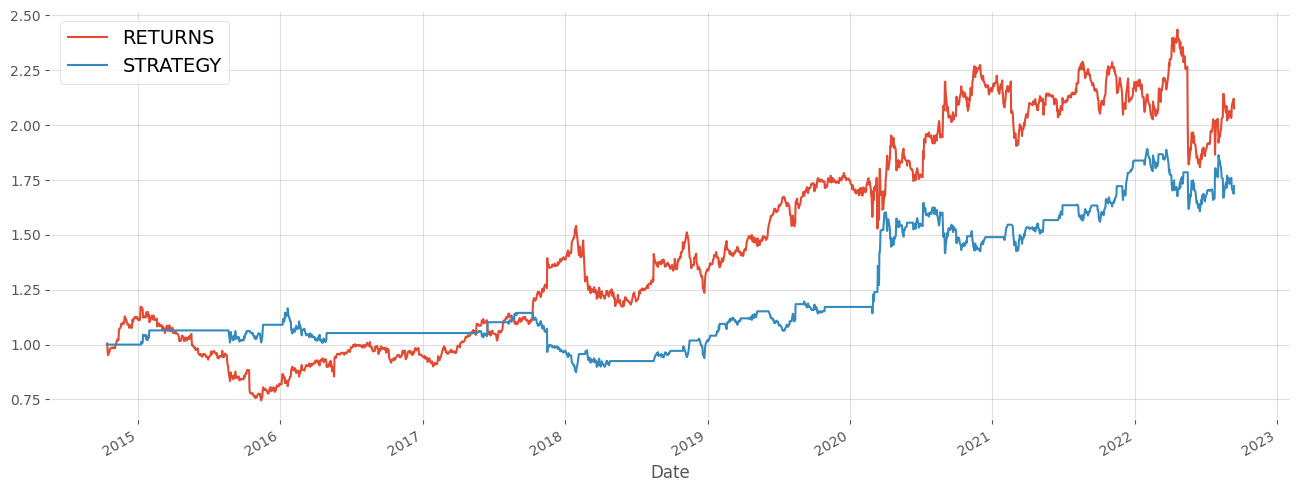

In [13]:
WMT['RETURNS'] = (
    np.log(
        WMT['WMT'] 
        /
        WMT['WMT']
        .shift(1)
    )
)

WMT['STRATEGY'] = (
    WMT['trading_positions']
    .shift(1)
    *
    WMT['RETURNS']
)

WMT['STRATEGY'] = WMT['STRATEGY'].fillna(0)

(
    WMT
    [["RETURNS", "STRATEGY"]]
    .cumsum()
    .apply(np.exp)
    .plot(figsize = [16, 6]
         )
)

### <font color = red> Question 8</font>. Please calculate the Sharpe Ratio of the strategies for `IBM` and `WMT`, respectively.

    Simple moving strategy for IBM leads to a Sharpe ratio of -0.5 . 

    Mean reversion strategy for WMT leads to a Sharpe ratio of 0.420 .

In [14]:
IBM_sharpe = (
    returns['strategy_returns']
    .mean() 
    / 
    returns['strategy_returns']
    .std() 
    * 
    np.sqrt(252)
)

WMT_sharpe = (
    WMT['RETURNS']
    .mean() 
    / 
    WMT['RETURNS']
    .std() 
    * 
    np.sqrt(252)
)

print(IBM_sharpe, WMT_sharpe)

-0.49971054843436014 0.42015257651214905


### <font color = red> Question 9</font>. Please calculate the Compound Annual Growth Rate (CAGR) of the strategies for `IBM` and `WMT`, respectively.

    Simple moving strategy for IBM leads to a CAGR of -11.6% . 

    Mean reversion strategy for WMT leads to a CAGR of 7.7% .


In [15]:
IBM_days = (
    (
        returns
        .dropna()
        .index[-1]
        -
        returns
        .dropna()
        .index[0]
    ).days
)

WMT_days = (
    (
        WMT
        .dropna()
        .index[-1]
        -
        WMT
        .dropna()
        .index[0]
    ).days
)

IBM_CAGR = (
    (
        returns
        .dropna()
        ['strategy_returns']
        .cumsum()
        .apply(np.exp)
        [-1]
        /
        returns
        .dropna()
        ['strategy_returns']
        .cumsum()
        .apply(np.exp)
        [0] 
    )
    ** (365 / IBM_days)
    - 1
)

WMT_CAGR = (
    (
        WMT
        .dropna()
        ['RETURNS']
        .cumsum()
        .apply(np.exp)
        [-1]
        /
        WMT
        .dropna()
        ['RETURNS']
        .cumsum()
        .apply(np.exp)
        [0] 
    )
    ** (365 / WMT_days)
    - 1
)

print(IBM_CAGR, WMT_CAGR)

-0.11587726823007738 0.07714996259546969


### <font color = red> Question 10</font>. This question is based on the following scenario. After reading it, please respond to the associated sub-questions.

> Scenario: You've been appointed as a Quantitative Researcher in the process-driven investing division of a leading hedge fund. As part of your onboarding challenge, you are handed data (`alphas.csv`) for three experimental trading models, codenamed Alphas A, B, and C. These models, each initiated with a capital of 100K, demonstrate nearly identical Sharpe ratios across a span of 1120 trading days. Intrigued by this uniformity yet aware of the Sharpe ratio's shortcomings, you embark on a journey to dissect the Alphas' performance through a multifaceted quantitative lens.

> 10-1. Sharpe Ratio Diagnostics:

- Given the daily return series for Alphas A, B, and C:

- Derive the annualized Sharpe ratio for each Alpha, with the industry-standard assumption of 252 trading days per annum. In light of these findings, how might you reconsider the perceived risk-adjusted returns of these models?

<font color = 'red'> All alphas returned negative shapre with Alpha A being the least negative </font>

> 10-2. Trajectory of Cumulative Returns:
    
- Visualize and compare the cumulative returns of each Alpha.

    10-3. Cumulative Returns Over a 1120-Day Horizon:
- Extrapolate the cumulative returns for each Alpha over this period. When evaluating based on the Compound Annual Growth Rate (CAGR), how do these Alphas stack up against one another?

<font color = 'red'> All alphas had similar cumulative returns although each trajectory was different </font>

> 10.4 Delving into Maximum Drawdown (MDD):
- Assess the Maximum Drawdown (MDD) for each model within this time frame. Based on this assessment, which Alpha appears best equipped to withstand market downturns?

<font color = 'red'> Alpha B </font>

> 10.5 Examining Drawdown Duration:
- Analyze the longest drawdown durations for each strategy. Which of the Alphas seems to have the quickest recovery mechanism following a significant drawdown?

> 10.6 Comprehensive Assessment of Strategy Performance:
- By synthesizing data from metrics such as the Sharpe ratio, cumulative returns trajectory, MDD, and drawdown duration, provide a well-rounded analysis of the three Alphas. Rank and justify your recommendations based on your quantitative insights.

> 10.7 Reflecting on the Sharpe Ratio:
- Given the observed disparities in cumulative returns and MDD among the Alphas, even with similar Sharpe ratios, evaluate the effectiveness of relying solely on the Sharpe ratio. Can you propose additional or refined metrics to differentiate between Alphas with matching Sharpe values but varying performances in other critical areas?

> 10-1. Sharpe Ratio Diagnostics:

In [16]:
alphas = (
    pd.read_csv(
        'Data/alphas.csv'
    )
)

alphas = (
    alphas
    .rename(
        columns = {
            'Unnamed: 0' : 'Date'
        }
    )  
    .set_index('Date')
)

alphas_returns = (
    np.log(
        alphas 
        /
        alphas.shift(1)
    )
)

In [17]:
sharpe = (
    alphas_returns
    .mean() 
    / 
    alphas_returns
    .std() 
    * 
    np.sqrt(252)
)

sharpe

Alphas A   -0.155830
Alphas B   -0.165371
Alphas C   -0.160252
dtype: float64

> 10-2. Trajectory of Cumulative Returns:

In [18]:
print(alphas_returns.cumsum().apply(np.exp).iloc[-1])

Alphas A    0.873013
Alphas B    0.866360
Alphas C    0.870173
Name: 2023-09-12, dtype: float64


>10-3. Cumulative Returns Over a 1120-Day Horizon:

<Axes: xlabel='Date'>

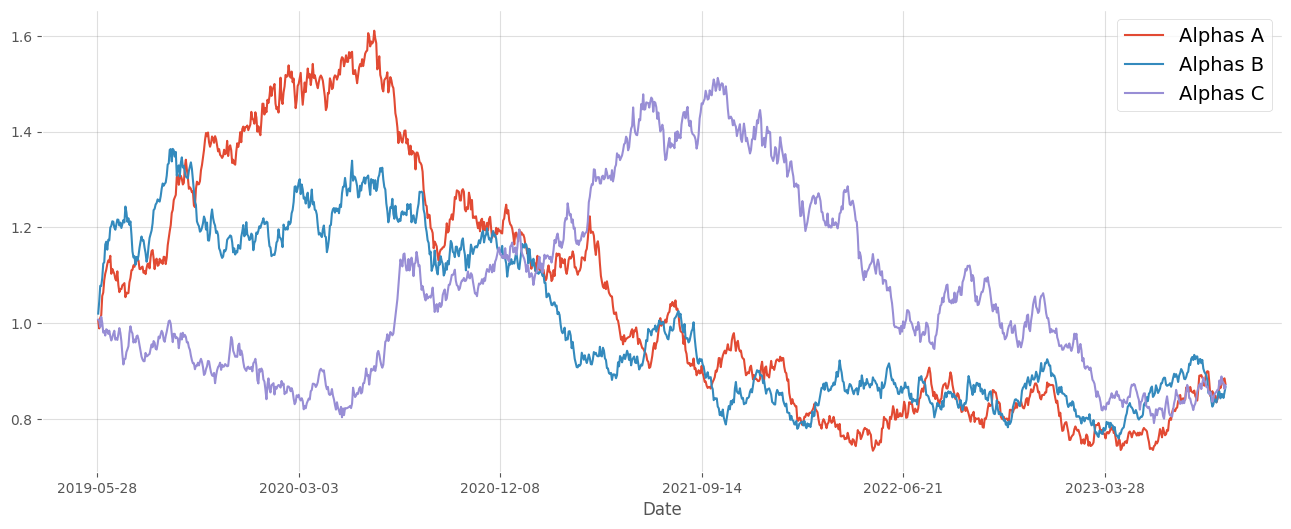

In [19]:
alphas_returns.cumsum().apply(np.exp).plot(figsize = [16,6])

> 10.4 Delving into Maximum Drawdown (MDD):

In [20]:
cum_rets = alphas_returns.cumsum().apply(np.exp)
cum_max = cum_rets.cummax()

<Axes: xlabel='Date'>

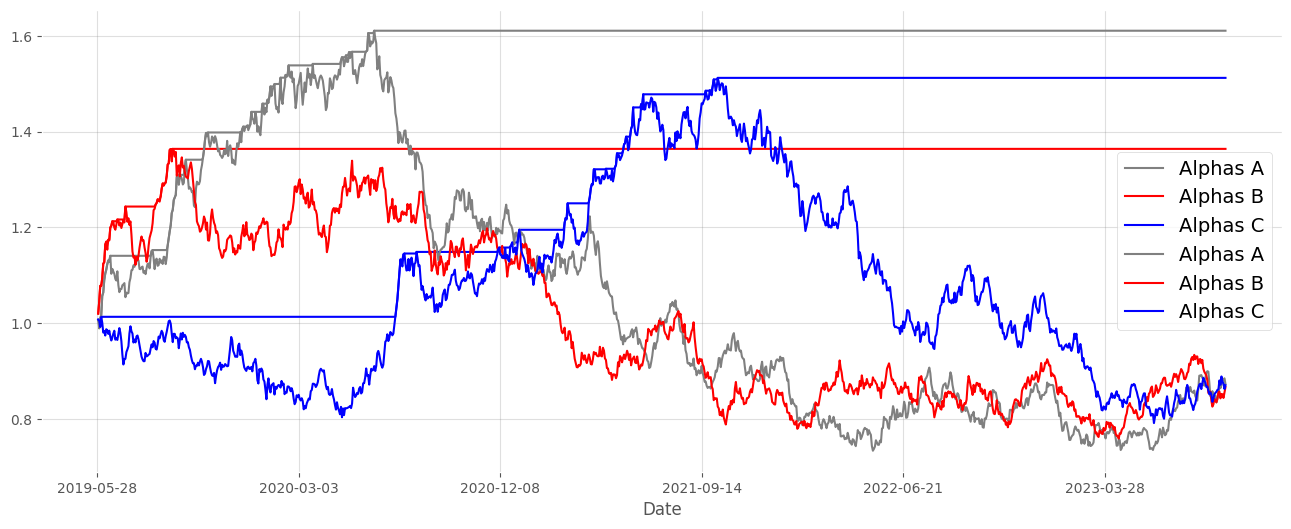

In [21]:
(
    pd.concat(
        [
            cum_max, 
            cum_rets
        ]
        , axis = 1
    )
    .plot(
        figsize = [16,6], 
        color = ['grey', 'red', 'blue','grey', 'red', 'blue']
    )
)

In [22]:
drawdown = 1 - (cum_rets / cum_max)
max_drawdown = drawdown.max()
max_drawdown

Alphas A    0.544602
Alphas B    0.443717
Alphas C    0.476758
dtype: float64

> 10.5 Examining Drawdown Duration:

In [23]:
drawdown.index = pd.to_datetime(drawdown.index)
for alpha in drawdown.columns:
    drawdown_duration = drawdown[[alpha]]
    periods = (
        np.diff(
            np.append(
                drawdown_duration[drawdown_duration[alpha] == 0].index,
                drawdown_duration.index[-1 : ]
            )
        )
    )

    max_period = (
        periods.max()
    /
    np.timedelta64(1, 'D') 
    )

    print(alpha, max_period)

Alphas A 1183.0
Alphas B 1463.0
Alphas C 706.0


### <font color="green">"Thank you for putting your efforts into the exercise problem sets 💯"</font>